/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL
epoch:0, train acc:0.07666666666666666, test acc:0.0993
epoch:1, train acc:0.09666666666666666, test acc:0.1061
epoch:2, train acc:0.12666666666666668, test acc:0.1206
epoch:3, train acc:0.16, test acc:0.133
epoch:4, train acc:0.22, test acc:0.1728
epoch:5, train acc:0.2733333333333333, test acc:0.2149
epoch:6, train acc:0.32666666666666666, test acc:0.244
epoch:7, train acc:0.3466666666666667, test acc:0.2663
epoch:8, train acc:0.37333333333333335, test acc:0.2865
epoch:9, train acc:0.39666666666666667, test acc:0.3041
epoch:10, train acc:0.41, test acc:0.3161
epoch:11, train acc:0.44333333333333336, test acc:0.3389
epoch:12, train acc:0.46, test acc:0.3517
epoch:13, train acc:0.4766666666666667, test acc:0.3724
epoch:14, train acc:0.49, test acc:0.3738
epoch:15, train acc:0.49, test acc:0.3854
epoch:16, train acc:0.5133333333333333, te

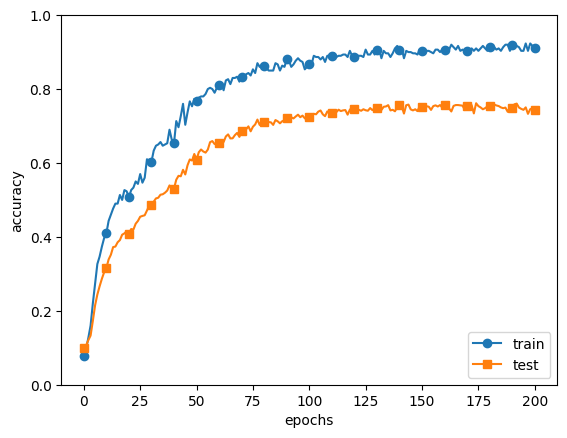

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
